In [1]:

from keras.models import Model
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:

# re-size all the images to this
image_size = [224, 224]

train_path = '../input/chest-xray-pneumonia/chest_xray/train'
valid_path = '../input/chest-xray-pneumonia/chest_xray/val'
test_path = '../input/chest-xray-pneumonia/chest_xray/test'

In [3]:
valid_path

'../input/chest-xray-pneumonia/chest_xray/val'

In [4]:
import os

In [5]:
os.listdir('../input/chest-xray-pneumonia/chest_xray/test')

['PNEUMONIA', 'NORMAL']

In [6]:
# to get the number of output classes
folders = glob('../input/chest-xray-pneumonia/chest_xray/train*')

In [7]:
image_size

[224, 224]

In [8]:
vgg16 = tf.keras.applications.vgg16.VGG16()
vgg16.summary()

553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [9]:
model = Sequential()
for layers in vgg16.layers[:-1]:
    model.add(layers)
for layer in vgg16.layers:
    layer.trainable = False
model.add(Dense(units=2, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [10]:
#costt and optimization methods
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [11]:
#for data importing
from keras.preprocessing.image import ImageDataGenerator

In [12]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
testing_datagen=ImageDataGenerator(rescale = 1./255
                                   )

In [14]:
validation_datagen=ImageDataGenerator(rescale = 1./255
                                   )

In [15]:
training_datagen

In [16]:
train_batches = testing_datagen.flow_from_directory(directory='../input/chest-xray-pneumonia/chest_xray/train',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [17]:
train_batches.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [18]:
img,label = next(train_batches)

In [19]:
def plot_img(img_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

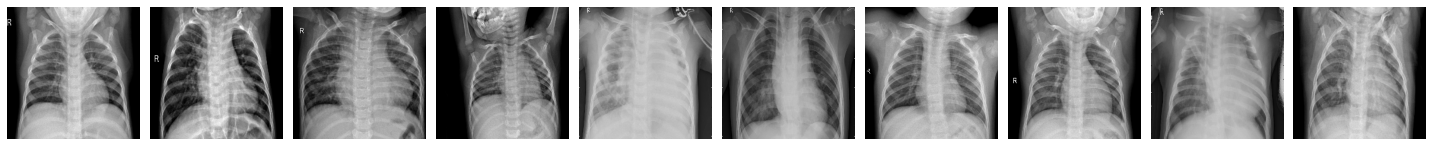

In [20]:
plot_img(img)


In [21]:
test_batches = testing_datagen.flow_from_directory(directory='../input/chest-xray-pneumonia/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [22]:
img,label = next(test_batches)

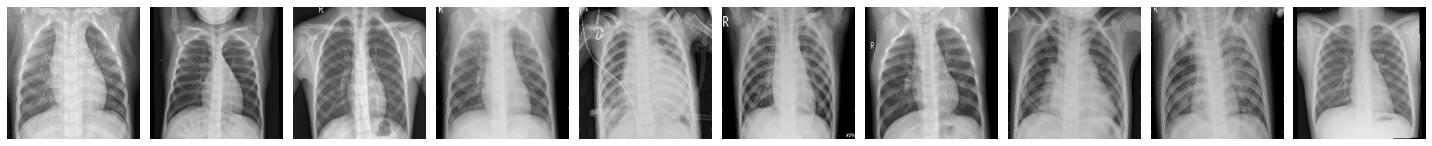

In [23]:
plot_img(img)


In [24]:
valid_batches = validation_datagen.flow_from_directory(directory='../input/chest-xray-pneumonia/chest_xray/val',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 16 images belonging to 2 classes.


In [25]:
valid_batches.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [26]:
assert train_batches.n ==5216
assert test_batches.n ==624
assert valid_batches.n ==16

In [27]:
model.fit(x = train_batches, 
          steps_per_epoch = len(train_batches),
          epochs = 7,
          verbose = 2
         )

Epoch 1/7
41/41 - 668s - loss: 0.5623 - accuracy: 0.7370
Epoch 2/7
41/41 - 560s - loss: 0.4937 - accuracy: 0.7429
Epoch 3/7
41/41 - 560s - loss: 0.4447 - accuracy: 0.7627
Epoch 4/7
41/41 - 560s - loss: 0.4046 - accuracy: 0.7939
Epoch 5/7
41/41 - 560s - loss: 0.3759 - accuracy: 0.8230
Epoch 6/7
41/41 - 560s - loss: 0.3537 - accuracy: 0.8443
Epoch 7/7
41/41 - 560s - loss: 0.3368 - accuracy: 0.8612


In [30]:
model.save('./modelh5')

In [31]:
predictions = model.predict(x= test_batches, steps= len(test_batches), verbose=0)

In [34]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                           cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 16 218]
 [ 44 346]]


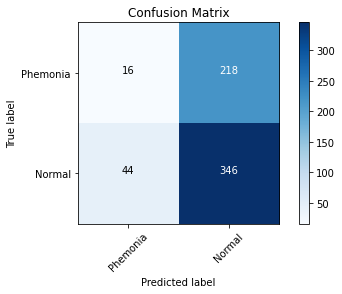

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['Phemonia','Normal']
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion Matrix')

In [36]:
#label with corresponding predicted probability

predindex = np.argmax(predictions, axis=1)



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

AttributeError: 'DirectoryIterator' object has no attribute 'argmax'